# Regression

### Importing Dependencies

In [11]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston

### Understanding the Dataset

In [3]:
boston=load_boston()   #The load_boston is already available in sklearn library
print(boston.DESCR)    #'DESCR' is to print its description

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Access Data Attributes

In [4]:
dataset= boston.data
for name,index in enumerate(boston.feature_names):
    print(index,name)

CRIM 0
ZN 1
INDUS 2
CHAS 3
NOX 4
RM 5
AGE 6
DIS 7
RAD 8
TAX 9
PTRATIO 10
B 11
LSTAT 12


### Re-shaping the Data

In [5]:
#Re-shaping the data from a 1D array to a 2D array:
data=dataset[:,12].reshape(-1,1)

In [6]:
# Shape of the data:
np.shape(dataset)

(506, 13)

In [7]:
# Target values:
target=boston.target.reshape(-1,1)

In [8]:
# Shape of target:
np.shape(target)

(506, 1)

### Plot lower income population v/s cost of the house

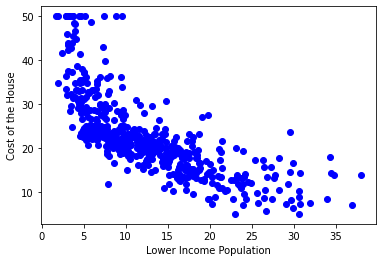

In [13]:
%matplotlib inline
plt.scatter(data,target,color='b')
plt.xlabel("Lower Income Population")
plt.ylabel("Cost of the House")
plt.show()

## Regression Model

In [14]:
#Regression Model
from sklearn.linear_model import LinearRegression

#Creating a regression model
regr=LinearRegression()

#fit the model
regr.fit(data,target)

LinearRegression()

### Prediction

In [16]:
pred=regr.predict(data)

### Plot Graph

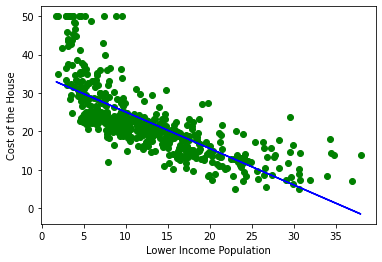

In [17]:
%matplotlib inline
plt.scatter(data,target,color='green')
plt.plot(data,pred,color='b')
plt.xlabel("Lower Income Population")
plt.ylabel("Cost of the House")
plt.show()

### Linear Regression using Lasso

In [18]:
#Regression Model
from sklearn.linear_model import Lasso

#Creating a regression model
regr=Lasso()

#fit the model
regr.fit(data,target)

Lasso()

In [19]:
# PREDICTION:
pred=regr.predict(data)

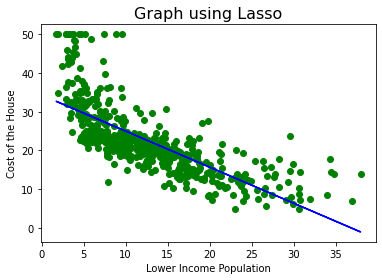

In [21]:
# PLOT GRAPH:
%matplotlib inline
plt.scatter(data,target,color='green')
plt.plot(data,pred,color='b')
plt.title("Graph using Lasso",fontdict={'fontsize':16})
plt.xlabel("Lower Income Population")
plt.ylabel("Cost of the House")
plt.show()

### Linear Regression Using Ridge

In [22]:
#Regression Model
from sklearn.linear_model import Ridge

#Creating a regression model
regr=Ridge()

#fit the model
regr.fit(data,target)

Ridge()

In [23]:
# PREDICTION:
pred=regr.predict(data)

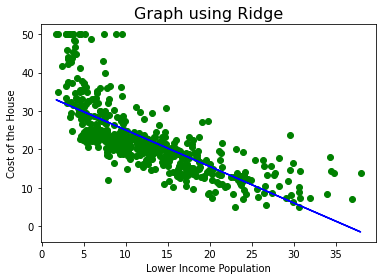

In [24]:
# PLOT GRAPH:
%matplotlib inline
plt.scatter(data,target,color='green')
plt.plot(data,pred,color='b')
plt.title("Graph using Ridge",fontdict={'fontsize':16})
plt.xlabel("Lower Income Population")
plt.ylabel("Cost of the House")
plt.show()

__CONCLUSION__ : The graphs formed using LinearRegression(),Lasso() and Ridge() are very similar.

Now, to get the optimized result, we make use of __Polynomial Regression__

## Polynomial Regression Model

Circumventing the curve issue using _polynomial regression model_

In [26]:
from sklearn.preprocessing import PolynomialFeatures

#To allow merging of linear Regression and Polynomial Regression model using 'pipelining'
from sklearn.pipeline import make_pipeline

In [27]:
model=make_pipeline(PolynomialFeatures(3),regr)

In [28]:
model.fit(data,target)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('ridge', Ridge())])

In [29]:
pred=model.predict(data)

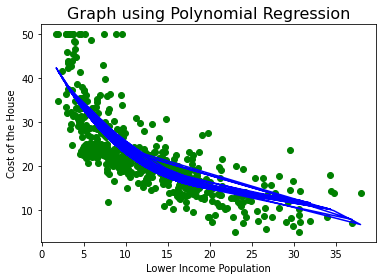

In [30]:
# PLOT GRAPH:
%matplotlib inline
plt.scatter(data,target,color='green')
plt.plot(data,pred,color='b')
plt.title("Graph using Polynomial Regression",fontdict={'fontsize':16})
plt.xlabel("Lower Income Population")
plt.ylabel("Cost of the House")
plt.show()

## Evaluation of the Model 

To judge the performance of the model, we find the value of __R2-score__

In [31]:
# R2-metric
from sklearn.metrics import r2_score

If the value of the r2_score is __1__ , then, __our data point is in sync with the model__
If the value of the r2_score is __-1__, then, __our data point is _not_ in sync with the model__

In [32]:
#Predict
r2_score(pred,target)

0.47933774372670657

This concludes that our data points are somewhat aligning with the model, but not completely.
This is the __optimized model__ we have obtained

# THE END